In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [49]:
# pip install mplsoccer

In [60]:
#Read in the data
df = pd.read_csv('data/dummy_pass_stats.csv')
# df = pd.read_excel('data/pass_stats_generator.xlsx')
# df = pd.read_excel('data/pass_stats_generator.xlsx')

In [61]:
#convert the data to match the mplsoccer statsbomb pitch
#to see how to create the pitch, watch the video here: https://www.youtube.com/watch?v=55k1mCRyd2k
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

In [62]:
df.head()

,player,x,y,outcome,endX,endY
0,Khalis,49.2,24.0,Successful,28.8,29.6
1,Khalis,56.4,24.8,Successful,78.0,56.0
2,Khalis,70.8,42.4,Unsuccessful,74.4,38.4
3,Khalis,67.2,48.0,Unsuccessful,99.6,51.2
4,Khalis,112.8,70.4,Unsuccessful,103.2,24.8


In [70]:
df.tail()

,player,x,y,outcome,endX,endY
681,Gan,106.8,41.6,Unsuccessful,63.6,10.4
682,Gan,64.8,11.2,Unsuccessful,100.8,36.8
683,Gan,68.4,15.2,Successful,72.0,5.6
684,Gan,82.8,21.6,Unsuccessful,72.0,24.8
685,Gan,49.2,15.2,Successful,96.0,33.6


In [64]:
df['player'].unique()

array(['Khalis', 'Faris', 'Hafiz', 'Danish', 'Imran', 'Isa', 'Muk',
       'Abdullah', 'Farhan', 'Ashraf', 'Hamizan', 'Hanif', 'Nabil', 'Gan'],
      dtype=object)

In [69]:
df['outcome'].unique()

array(['Successful', 'Unsuccessful'], dtype=object)

In [65]:
df_test = df[df['player']=='Faris']
df_test.head()

,player,x,y,outcome,endX,endY
49,Faris,34.8,8.0,Unsuccessful,44.4,12.0
50,Faris,40.8,13.6,Unsuccessful,44.4,36.0
51,Faris,64.8,20.0,Successful,55.2,26.4
52,Faris,56.4,31.2,Successful,76.8,42.4
53,Faris,88.8,33.6,Successful,70.8,11.2


In [71]:
def generate_heatmap(df_input, player_name):
    df = df_input[df_input['player']==player_name]
    fig ,ax = plt.subplots(figsize=(13.5,8))
    fig.set_facecolor('#22312b')
    ax.patch.set_facecolor('#22312b')

    #this is how we create the pitch
    pitch = Pitch(pitch_type='statsbomb', 
                pitch_color='#22312b', 
                line_color='#c7d5cc',
                )

    #Draw the pitch on the ax figure as well as invert the axis for this specific pitch
    pitch.draw(ax=ax)
    plt.gca().invert_yaxis()

    #Create the heatmap
    kde = sns.kdeplot(
            x=df['x'],
            y=df['y'],
            fill = True,
            shade_lowest=False,
            alpha=.5,
            n_levels=10,
            cmap = 'magma'
    )

    #use a for loop to plot each pass
    # for x in range(len(df['x'])):
    #     if df['outcome'][x] == 'Successful':
    #         plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='green')
    #         plt.scatter(df['x'][x],df['y'][x],color='green')
    #     if df['outcome'][x] == 'Unsuccessful':
    #         plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red')
    #         plt.scatter(df['x'][x],df['y'][x],color='red')
            
    plt.xlim(0,120)
    plt.ylim(0,80)

    plt.title('Player Heat Map From Recent Games',color='white',size=20)

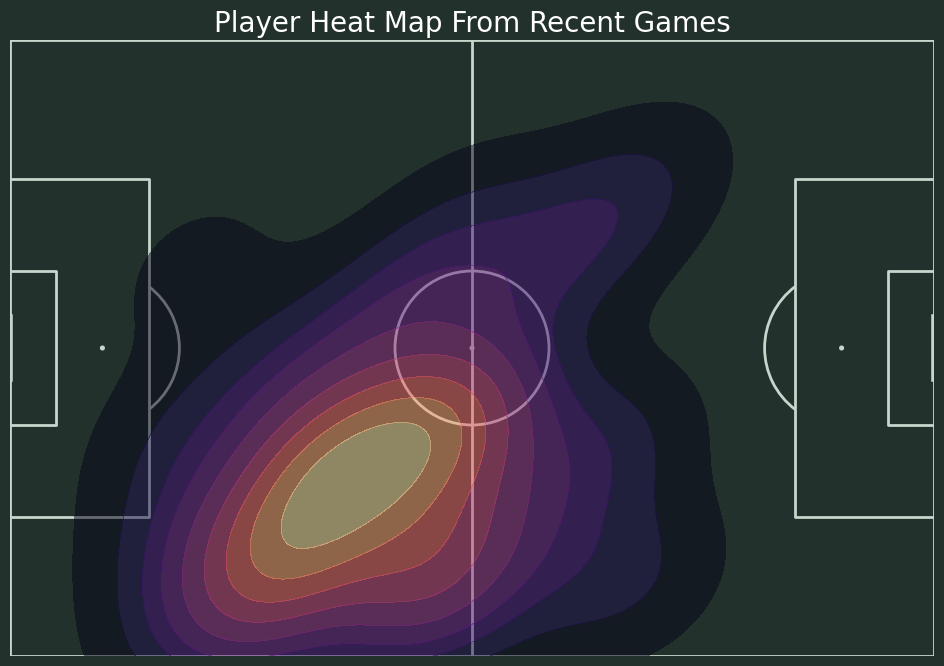

In [80]:
generate_heatmap(df, 'Danish')